# 1 - Neural mass model

In this example, we will learn about the basics of `neurolib`. We will create a two-population mean-field model of exponential integrate-and-fire neurons called the `aln` model. We will learn how to create a `Model`, set parameters and run a simulation. We will also see how we can easily access the output of each simulation.

## `aln` - the adaptive linear-nonlinear cascade model

The adaptive linear-nonlinear (`aln`) cascade model is a low-dimensional population model of spiking neural networks. Mathematically, it is a dynamical system of non-linear ODEs. The dynamical variables of the system simulated in the `aln` model describe the average firing rate and other **macroscopic variables** of a randomly connected, delay-coupled network of excitatory and inhibitory **adative exponential integrate-and-fire neurons (AdEx)** with non-linear synaptic currents. 

Ultimately, the model is a result of various steps of model reduction starting from the Fokker-Planck equation of the AdEx neuron subject to white noise input at many steps of input means $\mu$ and variances $\sigma$. The resulting mean firing rates and mean membrane potentials are then stored in a lookup table and serve as the nonlinear firing rate transfer function, $r = \Phi(\mu, \sigma)$. 

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
try:
    import neurolib
except ImportError:
    import sys
    !{sys.executable} -m pip install neurolib
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

## Basic usage

In [2]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np
import scipy

# Let's import the aln model
from neurolib.models.aln import ALNModel

# Some useful functions are provided here
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

## Simulating a single `aln` node

To create a single node, we simply instanciate the model 
without any arguments. 

In [5]:
# Create the model
model = ALNModel()

Let's have a look at the parameters of `model`

In [6]:
model.params

{'model': 'aln',
 'name': 'aln',
 'description': 'Adaptive linear-nonlinear model of exponential integrate-and-fire neurons',
 'dt': 0.1,
 'duration': 2000,
 'seed': None,
 'warn': 0,
 'dosc_version': 0,
 'distr_delay': 0,
 'filter_sigma': 0,
 'fast_interp': 1,
 'N': 1,
 'Cmat': array([[0.]]),
 'lengthMat': array([[0.]]),
 'signalV': 20.0,
 'c_gl': 0.3,
 'Ke_gl': 250.0,
 'tau_ou': 5.0,
 'sigma_ou': 0.0,
 'mue_ext_mean': 0.4,
 'mui_ext_mean': 0.3,
 'mue_ou': array([0.4]),
 'mui_ou': array([0.3]),
 'ext_exc_rate': 0.0,
 'ext_inh_rate': 0.0,
 'ext_exc_current': 0.0,
 'ext_inh_current': 0.0,
 'sigmae_ext': 1.5,
 'sigmai_ext': 1.5,
 'Ke': 800.0,
 'Ki': 200.0,
 'de': 4.0,
 'di': 2.0,
 'tau_se': 2.0,
 'tau_si': 5.0,
 'tau_de': 1.0,
 'tau_di': 1.0,
 'cee': 0.3,
 'cie': 0.3,
 'cei': 0.5,
 'cii': 0.5,
 'Jee_max': 2.43,
 'Jie_max': 2.6,
 'Jei_max': -3.3,
 'Jii_max': -1.64,
 'a': 0.0,
 'b': 0.0,
 'EA': -80.0,
 'tauA': 200.0,
 'C': 200.0,
 'gL': 10.0,
 'EL': -65.0,
 'DeltaT': 1.5,
 'VT': -50.0,
 'V

In [7]:
# Each model comes with a set of default parameters which are are a dictionary. 
# Let's change the parameter that controls the duration of a simulation to 10s.
model.params['duration'] = 10.0 * 1000  

# For convenience, we could also use:
model.params.duration = 10.0 * 1000

In [8]:
# In the aln model an Ornstein-Uhlenbeck process is simulated in parallel
# as the source of input noise fluctuations. Here we can set the variance
# of the process. 
# For more info: https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process 
# Let's add some noise.
model.params['sigma_ou'] = 0.1

In [9]:
# Finally, we run the model
model.run()

### Accessing the outputs

Accessing the outputs is straight-forward. Every model's outputs
are stored in the `model.outputs` attribute. According to the specific
name of each of the model's outputs, they can also be accessed as a 
key of the Model object, i.e. `aln['rates_exc']`.

In [10]:
# let's have a look at all outputs
model.outputs

{'t': array([1.0000e-01, 2.0000e-01, 3.0000e-01, ..., 9.9998e+03, 9.9999e+03,
        1.0000e+04]),
 'rates_exc': array([[60.60257347, 53.05259938, 47.21245976, ...,  3.21317524,
          3.2735299 ,  3.33804319]]),
 'rates_inh': array([[12.17493535, 11.7635157 , 11.34308592, ...,  0.74320547,
          0.7555826 ,  0.7705273 ]]),
 'IA': array([[4.43439609e+01, 4.43217889e+01, 4.42996280e+01, ...,
         8.45924300e-21, 8.45501338e-21, 8.45078587e-21]])}

In [11]:
# we can access them in different ways, choose one you like:
model.outputs['rates_exc']

array([[60.60257347, 53.05259938, 47.21245976, ...,  3.21317524,
         3.2735299 ,  3.33804319]])

In [12]:
model.rates_exc

array([[60.60257347, 53.05259938, 47.21245976, ...,  3.21317524,
         3.2735299 ,  3.33804319]])

In [13]:
model['rates_exc']

array([[60.60257347, 53.05259938, 47.21245976, ...,  3.21317524,
         3.2735299 ,  3.33804319]])

In [14]:
# each model has *one* default output which can be called via `model.output`
print("Default output of this model:", model.default_output)
model.output

Default output of this model: rates_exc


array([[60.60257347, 53.05259938, 47.21245976, ...,  3.21317524,
         3.2735299 ,  3.33804319]])

#### Plot output

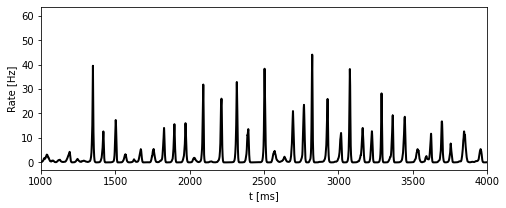

In [15]:
def plot_timeseries(model):
    plt.figure(figsize=(8, 3))
    plt.plot(model['t'], model['rates_exc'].T, lw=2, c='k')
    plt.xlabel("t [ms]")
    plt.ylabel("Rate [Hz]")
    plt.xlim(1000, 4000);
    plt.show()
    
plot_timeseries(model)

In [16]:
# Outputs are also available as an xr DataArray
xr = model.xr()
print(xr.dims)
# outputs can also be accessed via attributes in dot.notation
print("rates_exc", model.rates_exc)

('output', 'space', 'time')
rates_exc [[60.60257347 53.05259938 47.21245976 ...  3.21317524  3.2735299
   3.33804319]]


## Changing parameters

Let's increase the noise to, both, E and I populations.

sigma_ou = 0.0


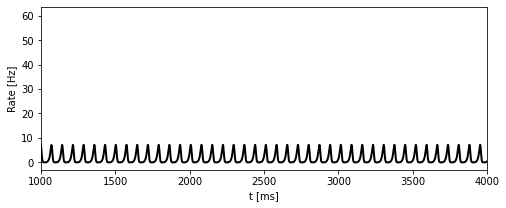

sigma_ou = 0.5


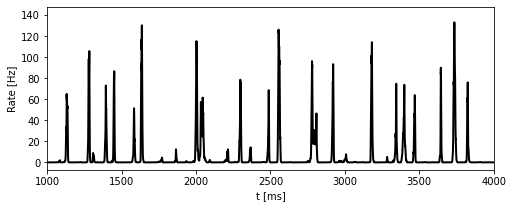

sigma_ou = 1.0


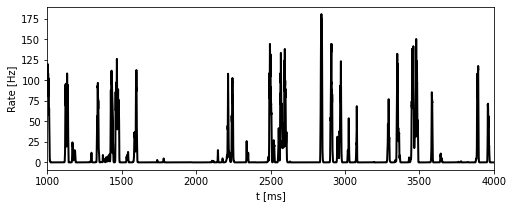

In [17]:
for noise in np.linspace(0, 1, 3):
    model.params.sigma_ou = noise
    model.run()
    print(f"sigma_ou = {noise}")
    plot_timeseries(model)

Now, let's change the input to the E population, step by step.

mue_ext_mean = 0.0


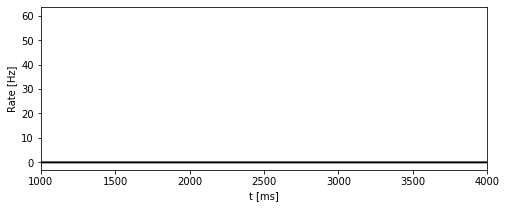

mue_ext_mean = 1.0


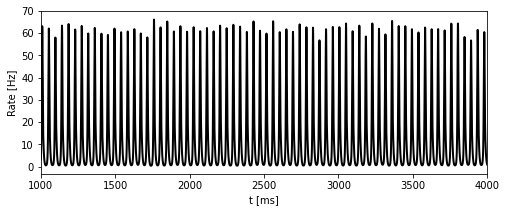

mue_ext_mean = 2.0


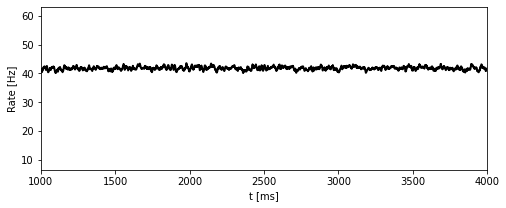

In [18]:
model.params.sigma_ou = 0.01
for input_to_e in np.linspace(0, 2, 3):
    model.params.mue_ext_mean = input_to_e
    model.run()
    print(f"mue_ext_mean = {input_to_e}")
    plot_timeseries(model)

## Frequency analysis

We can easily get the power spectrum of the output of a model using the built-in function `getPowerSpectrum` in `neurolib.utils.functions`.

Text(0, 0.5, 'Power [Hz^2/Hz]')

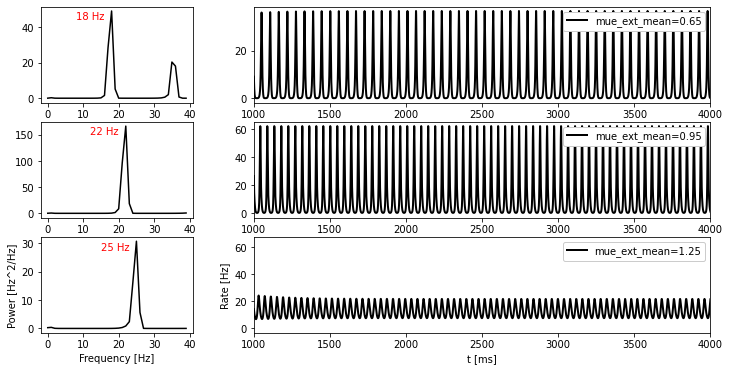

In [9]:
import neurolib.utils.functions as func

model = ALNModel() 
model.params.duration = 5000 # ms

n_plots = 3
fig, axs = plt.subplots(n_plots, 2, figsize=(12, 6), gridspec_kw={"width_ratios" : [1, 3]})

for i, input_to_e in enumerate(np.linspace(0.65, 1.25, n_plots)):
    model.params.mue_ext_mean = input_to_e
    model.run()
    frs, powers = func.getPowerSpectrum(model.output, dt=model.params.dt, maxfr=40)
    axs[i, 0].plot(frs, powers, c='k')
    axs[i, 0].text(frs[np.argmax(powers)]-10, np.max(powers)*0.9, f"{frs[np.argmax(powers)]:0.0f} Hz", color='r')
    axs[i, 1].plot(model['t'], model['rates_exc'].T, label=f'mue_ext_mean={model.params.mue_ext_mean}', lw=2, c='k')
    axs[i, 1].set_xlim(1000, 4000);
    axs[i, 1].legend(loc=1, framealpha=1.0)
    
axs[n_plots-1, 1].set_xlabel("t [ms]")
axs[n_plots-1, 1].set_ylabel("Rate [Hz]")    
axs[n_plots-1, 0].set_xlabel("Frequency [Hz]")
axs[n_plots-1, 0].set_ylabel("Power [Hz^2/Hz]")    

# 2 - Whole-brain modeling

`neurolib` comes with some example datasets for exploring its functionality. Please be aware that these datasets are not tested and should not be used for your research, only for experimentation with the software.

A dataset for whole-brain modeling can consists of the following parts:

* A structural connectivity matrix capturing the synaptic connection strengths between brain areas, often derived from DTI tractography of the whole brain. The connectome is then typically parcellated in a preferred atlas (for exapmle the AAL2 atlas) and the number of axonal fibers connecting each brain area with every other area is counted. This number serves as a indication of the synaptic coupling strengths between the areas of the brain. 
* A delay matrix which can be calculated from the average length of the axonal fibers connecting each brain area with another.
* A set of functional data that can act as a target for model optimization. Resting-state fMRI offers an easy and fairly unbiased way for calibrating whole-brain models. EEG data could be used as well.

We can load a `Dataset` by passing the name of it in the constructor. 

In [11]:
from neurolib.utils.loadData import Dataset
ds = Dataset("gw")

Let's have a look what the data looks like. We can access the
data of each model by calling its internal attrivbutes.
Here, we plot the *subject-averaged* structural connectivity matrix by calling 
`ds.Cmat` and fiber length matrix by calling 
`ds.Dmat`. The functional conencity matrices 
of the BOLD timeseries in the datasets are given as list 
`ds.FCs`.

Text(0, 0.5, 'Brain area')

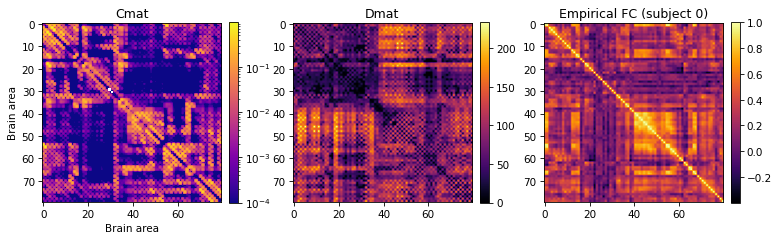

In [12]:
from matplotlib.colors import LogNorm
fig, axs = plt.subplots(1, 3, figsize=(12,8), dpi=75)
fig.subplots_adjust(wspace=0.28)

im = axs[0].imshow(ds.Cmat, norm=LogNorm(vmin=10e-5, vmax=np.max(ds.Cmat)))
axs[0].set_title("Cmat")
fig.colorbar(im, ax=axs[0],fraction=0.046, pad=0.04)
im = axs[1].imshow(ds.Dmat, cmap='inferno')
axs[1].set_title("Dmat")
fig.colorbar(im, ax=axs[1],fraction=0.046, pad=0.04)
im = axs[2].imshow(ds.FCs[0], cmap='inferno')
axs[2].set_title("Empirical FC (subject 0)")
fig.colorbar(im, ax=axs[2],fraction=0.046, pad=0.04)
axs[0].set_xlabel("Brain area")
axs[0].set_ylabel("Brain area")

## Empirical datasets

The `Dataset` class loads subject-wise empirical matrices in `NxN` form (`N` being the number of brain regions to simulate) and automatically generates the averaged structural connectivity matrix `ds.Cmat` and fiber length matrix `ds.Dmat`. Additionally, it loads a BOLD time series in `Nxt` shape and generate functional connectivity matrices `ds.FCs`. 

Let's plot the subject-wise data. 

### Structural connectivity

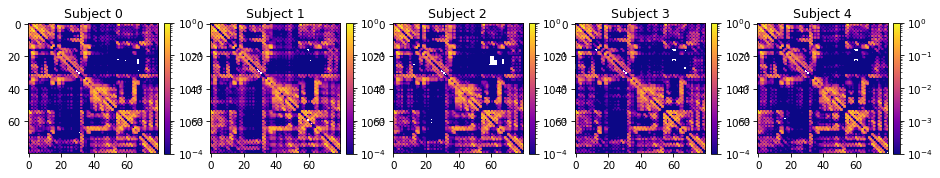

In [36]:
fig, axs = plt.subplots(1, len(ds.Cmats), figsize=(len(ds.Cmats)*3,8), dpi=75)
fig.subplots_adjust(wspace=0.28)
for i, sc in enumerate(ds.Cmats):
    im = axs[i].imshow(sc, norm=LogNorm(vmin=10e-5, vmax=np.max(sc)))
    axs[i].set_title(f"Subject {i}")
    fig.colorbar(im, ax=axs[i],fraction=0.046, pad=0.04)

### Functional connectivity

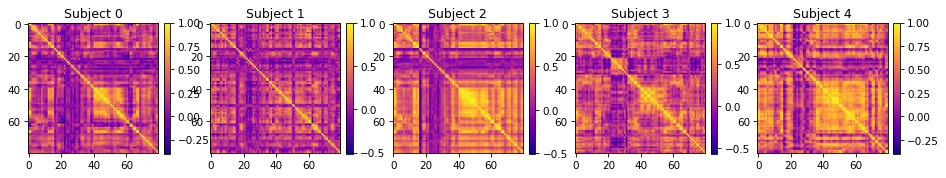

In [34]:
fig, axs = plt.subplots(1, len(ds.FCs), figsize=(len(ds.FCs)*3,8), dpi=75)
fig.subplots_adjust(wspace=0.28)
for i, fc in enumerate(ds.FCs):
    im = axs[i].imshow(fc)
    axs[i].set_title(f"Subject {i}")
    fig.colorbar(im, ax=axs[i],fraction=0.046, pad=0.04)

## Initialize whole-brain model

We now create the `aln` model with a structural connectivity matrix and a delay matrix. In order to achieve a good fit of the BOLD activity to the empirical data, the model has to run for quite a while. A a rule of thumb, a simulation of resting-state BOLD activity should not be shorter than 3 minutes and preferrably longer than 5 minutes real time. If the empirical recordings are for example 10 minues long, ideally, a simulation of 10 minutes would be used to compare the output of the model to the resting state recording.

In [38]:
model = ALNModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

model.params['duration'] = 1*60*1000 
# Info: value 0.2*60*1000 is low for testing
# use 5*60*1000 for real simulation

After some optimization to the resting-state fMRI data of the dataset, we 
found a set of parameters that creates interesting whole-brain dynamics. 
We set the mean input of the excitatory and the inhibitory population to be 
close to the E-I limit cycle.

In [39]:
model.params['mue_ext_mean'] = 1.57
model.params['mui_ext_mean'] = 1.6
# We set an appropriate level of noise
model.params['sigma_ou'] = 0.09
# And turn on adaptation with a low value of spike-triggered adaptation currents.
model.params['b'] = 5.0

### Run model

We run the model with bold simulation by using `bold=True`. 
This simulates the Balloon-Windkessel BOLD model in parallel to
the neural population model in order to estimate the blood oxigen
levels of the underlying neural activity. The output of the `bold`
model can be used to compare the simulated data to empirical fMRI 
data (resting-state fMRI for example).

To save (a lot of) RAM, we can run the simulation in `chunkwise` mode.
In this mode, the model will be simulated for a length of `chunksize` 
steps (not time in ms, but actual integration steps!), and the output
of that chunk will be used to automatically reinitiate the model with 
the appropriate initial conditions. This allows for a serial continuation
of the model without having to store all the data in memory and is 
particularly useful for very long and many parallel simulations.

In [40]:
model.run(chunkwise=True, chunksize = 100000, bold=True)

## Results

The outputs of the model can be accessed using the attribute `model.outputs`

In [41]:
model.outputs

{'t': array([1.0000e-01, 2.0000e-01, 3.0000e-01, ..., 9.9998e+03, 9.9999e+03,
        1.0000e+04]),
 'rates_exc': array([[0.09276927, 0.0937344 , 0.09456307, ..., 0.28113962, 0.2760068 ,
         0.27055437],
        [0.00709942, 0.0074378 , 0.0077773 , ..., 0.02313076, 0.02322162,
         0.02327004],
        [0.30574751, 0.30722949, 0.30860507, ..., 0.10935645, 0.11153819,
         0.11371689],
        ...,
        [0.03791557, 0.03797179, 0.038058  , ..., 0.01225937, 0.0123435 ,
         0.01238427],
        [0.02177493, 0.0217737 , 0.02184523, ..., 2.66869188, 2.7162505 ,
         2.75699748],
        [0.41247523, 0.41005906, 0.40850628, ..., 0.01597384, 0.01597703,
         0.01596395]]),
 'rates_inh': array([[ 6.1535549 ,  6.13756205,  6.11763371, ..., 11.45003944,
         11.33043372, 11.19163256],
        [ 4.49139155,  4.51317162,  4.54600363, ...,  6.60335271,
          6.6309366 ,  6.65333669],
        [ 6.33133258,  6.36672435,  6.39460994, ...,  4.17227115,
          4.2

Since we used `bold=True` to simulate BOLD, we can also access `model.BOLD.BOLD` for the actual BOLD activity, and `model.BOLD.t` for the time steps of the BOLD simulation (which are downsampled to `0.5 Hz` by default).

### Plot simulated activity

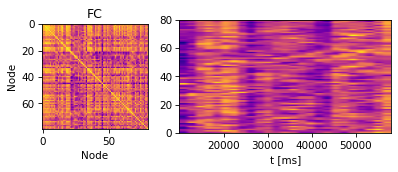

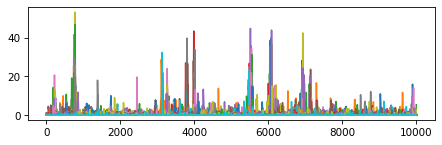

In [46]:
# Plot functional connectivity and BOLD timeseries (z-scored)
fig, axs = plt.subplots(1, 2, figsize=(6, 2), dpi=75, gridspec_kw={'width_ratios' : [1, 2]})
axs[0].imshow(func.fc(model.BOLD.BOLD[:, 5:]))
axs[1].imshow(scipy.stats.mstats.zscore(model.BOLD.BOLD[:, model.BOLD.t_BOLD>10000], axis=1), aspect='auto', extent=[model.BOLD.t_BOLD[model.BOLD.t_BOLD>10000][0], model.BOLD.t_BOLD[-1], 0, model.params['N']]);

axs[0].set_title("FC")
axs[0].set_xlabel("Node")
axs[0].set_ylabel("Node")
axs[1].set_xlabel("t [ms]")

# the results of the model are also accesible through an xarray DataArray
fig, axs = plt.subplots(1, 1, figsize=(7, 2), dpi=75)
plt.plot(model.xr().time, model.xr().loc['rates_exc'].T);

### Correlation of simulated BOLD to empirical data

We can compute the element-wise Pearson correlation of the functional connectivity matrices of the simulated data to the empirical data to estimate how well the model captures the inter-areal BOLD correlations found in empirical resting-state recordings. 

In [47]:
scores = [func.matrix_correlation(func.fc(model.BOLD.BOLD[:, 5:]), fcemp) for fcemp in ds.FCs]

print("Correlation per subject:", [f"{s:.2}" for s in scores])
print(f"Mean FC/FC correlation: {np.mean(scores):.2}")

Correlation per subject: ['0.28', '0.27', '0.25', '0.29', '0.39']
Mean FC/FC correlation: 0.3


# 3 - Custom model

## Model equations

In this example we will implement a linear model with the following equation:

$\frac{d}{dt} x_i(t) = - \frac{x_i(t)}{\tau} + \sum_{j=0}^{N} K G_{ij} x_j(t)$.

Here, we simulate $N$ nodes that are coupled in a network. $x_i$ are the elements of an $N$-dimensional state vector, $\tau$ is the decay time constant, $G$ is the adjacency matrix and $K$ is the global coupling strength.

## Implementation

We first create a class for the model called `LinearModel` which inherits lots of functionality from the `Model` base class. We define `state_vars` and `default_output` so that `neurolib` knows how to handle the variables of the system. Next, we define `init_vars` in order to use the autochunk integration scheme, so we can save a lot of RAM when we run very long simulations. 
```
class LinearModel(Model):
    state_vars = ["x"]
    default_output = "x"
    init_vars = ["x_init"]
```
Next we define a simple parameter dictionary called `params`. In here, we can define all the necessary parameters of the model and change their values later. In this example, we set the timescale $\tau$, the coupling strength $K$, the integration time step `dt` (in ms) and the duration to 100 ms.
```
params = dict(tau=10, K=1e-2, dt=1e-1, duration=100)
```
We are now ready to set up the constructor of our model! This method is supposed to set up the model and prepare it for integration. All the magic happens in the background! We pass the `self.timeIntegration` function and the parameter dictionary `self.params` to the base class using `super().__init__()`.
```
def __init__(self, Cmat=np.zeros((1,1))):
        self.params['Cmat'] = Cmat
        super().__init__(self.timeIntegration, self.params)
```
That wasn't too bad, was it? We are finally ready to define the time integration method that prepares all variables and passes it to the last function that will crunch the numbers. Here we prepare the numpy arrays that will hold the simulation results. We have to prepare them before we can execute the numba code. 

```
def timeIntegration(self, p):
    N = p['Cmat'].shape[0]
    t = np.arange(1, p['duration']/p['dt']) # holds time steps
    x = np.ndarray((N, len(t)+1)) # holds variable x
```
Next, we make use of a neurolib convention to prepare the initial conditions of our model. If you remember, we defined `init_vars` above in order to use the autochunk feature. The autochunk feature will automatically fill this parameter with the last state of the last simulated chunk so the model integration can be continued without having to remember the entire output and state variables of the model indefinitely. In this line, we check whether x_init is set or not (which it will be, when we use chunkwise integration). If it is not set, we simply use random initial conditions using `rand((N, 1))`. Remember that the convention for array dimensions is `array[space, time]`, meaning that we only fill in the first time step with the initial condition. 
```
# either use predefined initial conditions or random ones
x[:, :1] = p.get('x_init') if p.get('x_init') is not None else rand((N, 1))
```
We're ready to call our accelerated integration part and return the results 🚀!
```
return njit_integrate(x, t, p['tau'], p['K'], N, p['Cmat'], p['dt'])
```

## Numba time integration 

Remember to put this function outside of the class definition, so we can use use `numba` acceleration to greatly increase the performance of our code. We first have to let `numba` know which part of the code to precompile. We do this by simply placing the decorator `@numba.njit` in the line above the integration function. Easy way of getting 100x faster code! ❤️ `numba`! 
```
@numba.njit
def njit_integrate(x, t, tau, K, N, Cmat, dt):
```
Next, we do some simple math. We first loop over all time steps. If you have prepared the array `t` as described above, you can simply loop over its length. In the next line, we calculate the coupling term from the model equation above. However, instead of looping over the sum, we use a little trick here and simply compute the dot product between the coupling matrix `G` and the state vector `x`. This results in a `N`-dimensional vector that carries the amount of input each node receives at each time step. Finally, we loop over all nodes so we can finally add up everything.

```
for i in range(1, 1 + len(t)): # loop over time
    inp = Cmat.dot(x[:, i-1]) # input vector
    for n in range(N): # loop over nodes
```
In the next line, we integrate the equation that we have shown above. This integration scheme is called Euler integration and is the most simple way of solving an ODE. The idea is easy and is best expressed as `x_next = x_before + f(x) * dt` where `f(x)` is simply the time derivative $\frac{d}{dt} x_i(t)$ shown above.
```
x[n, i] = x[n, i-1] + (- x[n, i-1] / tau + K * inp[n]) * dt # model equations
```
We're done! The only thing left to do is to return the data so that neurolib can take over from here on. The outputs of this simulation will be available in the `model.outputs` attribute. You can see an example time series below. 
```
return t, x
```

## Code

In [12]:
import numba
import numpy as np
from numpy.random import random as rand
from neurolib.models.model import Model

class LinearModel(Model):
    state_vars = ["x"]
    default_output = "x"
    init_vars = ["x_init"]
    params = dict(tau=10, K=1e-2, dt=1e-1, duration=100)
    def __init__(self, Cmat=np.zeros((1,1))):
        self.params['Cmat'] = Cmat
        super().__init__(self.timeIntegration, self.params)
        
    def timeIntegration(self, p):
        p['N'] = p['Cmat'].shape[0] # number of nodes
        t = np.arange(1, p['duration']/p['dt'] + 1) # holds time steps
        x = np.ndarray((p['N'], len(t)+1)) # holds variable x
        # either use predefined initial conditions or random ones
        x[:, :1] = p['x_init'] if 'x_init' in p else rand((p['N'], 1))
        return njit_integrate(x, t, p['tau'], p['K'], p['N'], p['Cmat'], p['dt'])

@numba.njit
def njit_integrate(x, t, tau, K, N, Cmat, dt):
    for i in range(1, 1 + len(t)): # loop over time
        inp = Cmat.dot(x[:, i-1]) # input vector
        for n in range(N): # loop over nodes
            x[n, i] = x[n, i-1] +\
            (- x[n, i-1] / tau + K * inp[n]) * dt # model equations
    return t, x

## Running the model

We prepare a "mock" connectivity matrix, simply consisting of 12x12 random numbers, meaning that we will simulate 12 `LinearModel`'s in a network.

In [13]:
Cmat = rand((12, 12)) # use a random connectivity matrix
model = LinearModel(Cmat) # initialize the model

That's it, we are finally ready to run the model.

In [14]:
model.run()

## Plot outputs

Text(0, 0.5, 'Activity $x$')

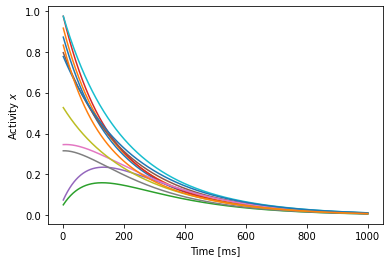

In [15]:
plt.plot(model.t, model.output.T);
plt.xlabel("Time [ms]")
plt.ylabel("Activity $x$")

## BOLD and autochunk

Since we've followed the model implementation guidelines, the model is also compatible with chunkwise integration and can produce a BOLD signal. Let's try it out!

In [16]:
model.params.duration=200000
model.run(chunkwise=True, append_outputs=True, bold=True)

Text(0, 0.5, 'BOLD activity')

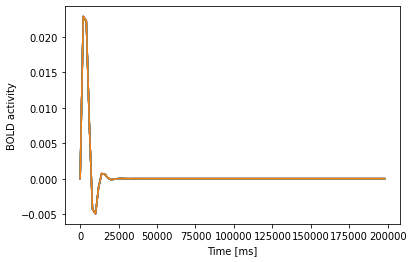

In [17]:
plt.plot(model.BOLD.t_BOLD, model.BOLD.BOLD.T);
plt.xlabel("Time [ms]")
plt.ylabel("BOLD activity")